<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Mercy Arrobo  <br>
Fecha: DD/MM/2022

# Importación de librerias necesarias

In [4]:
#Para esta actividad se importarán las siguientes librerías:
#Para esta actividad se importarán las siguientes librerías:
#importar la libreria pandas que proporcina herramientas de análisis y manipulación de datos de alto rendimiento.
import pandas as pd
#Importamos la libreria seaborn
import seaborn as sns
#matplotlib para la creación de gráficos, sklearn para llamar a funciones de rendimiento
from sklearn.preprocessing import StandardScaler
# Impotamos la clase train_test_split
from sklearn.model_selection import train_test_split
#Importamos de modelo linear_model
from sklearn import linear_model
#Importamos las librerias de determinación de las metricas que se obtienen en el antrenamiento
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

## Cargar el Dataset

In [5]:
#Código para cargar el Dataset
#Cargar dataset
Real_State = pd.read_csv('Real estate.csv')
#Mostrar dataset
Real_State.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Descripción de la fuente del Dataset

El tema fue tomada de una página de los 10 dataset para usar en regresión lineal (https://www.telusinternational.com/articles/10-open-datasets-for-linear-regression) y el dataset fue extraido desde la página Kaggle https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?resource=download. Lo cuál contiene datos de fecha, edad, laitud, longitud de la casa que son evaluados y de los cuales de obtiene el precio por unidad del área. Además el dataset está diseñado para análisis de regresión, regresión lineal, regresión múltiple y modelos de predicción.

## Explique el problema a resolver. 
Basado en los datos de latitud y longitud, este es conjunto de datos históricos del mercado de la valoración de bienes raíces en Taipei, Taiwán. La "valoración inmobiliaria" es un problema de regresión. Por lo tanto, se trata de predicir de precios de la vivienda por unidad de área, mediante las características de la fecha de compra, la antigüedad de la casa, la ubicación, la distancia a la estación mrt más cercana y el precio de la casa del área unitaria.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [6]:
# Número de instancias en total
Real_State.count()

No                                        414
X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

In [7]:
#Número de atributos de entrada, su significado y tipo
Real_State.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
#Estadísticas de la variable objetivo.
Precio = Real_State['Y house price of unit area']
#Describe la variable objetivo
Precio.describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

<AxesSubplot:xlabel='Y house price of unit area', ylabel='Count'>

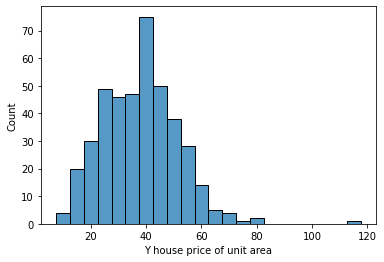

In [9]:
#Estadististica de la variable objetivo
sns.histplot(Real_State['Y house price of unit area'])

In [10]:
#Estadísticas los atributos en relación con la variable objetivo.
atributos = Real_State[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
#Describe la realción
atributos.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


Está dataset tiene 414 instancias con 6 atributos. De la cuál los 6 atributos se dividen en variables de entrada y salidad. Las variables de entrada son los siguientes: X1=la fecha de la transacción (por ejemplo, 2013.250=2013 marzo, 2013.500=2013 junio, etc.); X2=la edad de la casa (unidad: año); X3=la distancia a la estación MRT más cercana (unidad: metro); X4=el número de tiendas de conveniencia en el círculo vivo a pie (entero); X5=la coordenada geográfica, latitud. (unidad: grado); X6=la coordenada geográfica, longitud. (unidad: grado). La variable de salida es "Y" = precio de la vivienda de la unidad de área (10000 Nuevo dólar taiwanés / Ping, donde Ping es una unidad local, 1 Ping = 3,3 metros cuadrados), siendo la variable objetivo. En la estadistica de la variable objetivo se obtuvo el promedio de 37.98

**variable objetivo "y" o también denominada variable dependiente**

- Y house price of unit area

**Variables de entrada "x" o también denominada variable independiente**

- X1=la fecha de la transacción
- X2=la edad de la casa 
- X3=la distancia a la estación MRT más cercana
- X4=el número de tiendas de conveniencia en el círculo vivo a pie
- X5=la coordenada geográfica, latitud. 
- X6=la coordenada geográfica, longitud.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [11]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
#Definir la variable objetivo 
variable_objetivo = Real_State[['Y house price of unit area']]
#Definir las caracteristicas / variables de entrada
variable_entrada = Real_State[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]

In [12]:
#Verificar si existen datos nulos
variable_objetivo.isnull().sum().any()

False

In [13]:
#Verificar si existen datos nulos
variable_entrada.isnull().sum().any()

False

In [14]:
#Estandarización de la data variable x
VariablesEntradaScaler=StandardScaler()
#Estandarización de la data variable y
VariableObjetivoScaler=StandardScaler()

In [15]:
#Almacenamiento del objeto de ajuste para referencia posterior x
VariablesEntradaFit=VariablesEntradaScaler.fit(variable_entrada)
#Almacenamiento del objeto de ajuste para referencia posterior y
VariableObjetivoFit=VariableObjetivoScaler.fit(variable_objetivo)

In [16]:
#Generación de los valores estandarizados de X
X=VariablesEntradaFit.transform(variable_entrada)
#Generación de los valores estandarizados de y
y=VariableObjetivoFit.transform(variable_objetivo)

## División del dataset en datos de entrenamiento y datos de test 

In [17]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
# Separamos los datos del conjunto de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
# Mostramos los datos de entrenamiento y prueba de entrada
X_train.shape, X_test.shape

((289, 6), (125, 6))

In [19]:
# Mostramos los datos de entrenamiento y prueba de salida
y_train.shape, y_test.shape

((289, 1), (125, 1))

## Regresión Lineal

In [20]:
#Código del modelo
#Crear un modelo de atribución lineal
model = linear_model.LinearRegression()

In [21]:
#Entrenamiento
#Entrenar el modelo y estimar la varianza del modelo
model.fit(X_train, y_train)
#Imprime los coeficientes
print(model.coef_)

[[ 0.08553013 -0.19020515 -0.38780415  0.25866343  0.20303797 -0.00348788]]


In [22]:
#Test
#Realizamos la predicción utilizando los datos de prueba.
y_predict = model.predict(X_test)

## Evaluación del Modelo

In [23]:
#Medición de la precisión del modelo en el tren.
print(f'Trainining Acc {round(model.score(X_train, y_train) * 100, 2)}%')
#Medición de la precisión del modelo en el conjunto de datos de prueba.
print(f'Testing Acc {round(model.score(X_test, y_test) * 100, 2)}%')

Trainining Acc 60.29%
Testing Acc 54.19%


In [24]:
#Mostrar datos de prueba y su error
#auxiliar de y_test como y_aux
y_aux = pd.DataFrame (y_test, columns =['y_aux'])
#Obtencion de datos 
y_test_inverso = VariableObjetivoFit.inverse_transform(y_aux)
#auxiliar de y_predict como y_aux
y_aux = pd.DataFrame (y_predict, columns =['y_aux'])
#Obtencion de datos 
y_pred_inverso = VariableObjetivoFit.inverse_transform(y_aux)
#Mostrar los datos de precio de prueba y los predecidos
df = pd.DataFrame(list(zip([i[0] for i in y_test_inverso],[ i[0] for i in y_pred_inverso])),columns =['Precio prueba','Precio predecido'])
#Mostrar el margen de error entre lo predecido y la prueba.
df['error']=abs(df['Precio prueba']-df['Precio predecido'])
df

,Precio prueba,Precio predecido,error
0,27.3,33.766103,6.466103
1,54.4,46.435215,7.964785
2,22.0,22.548904,0.548904
3,11.6,13.368298,1.768298
4,45.4,41.398144,4.001856
...,...,...,...
120,42.5,43.900672,1.400672
121,20.0,15.207343,4.792657
122,40.6,36.844268,3.755732
123,29.3,41.003854,11.703854


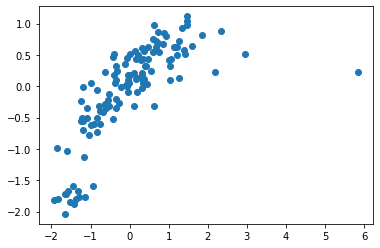

In [25]:
#Grafica de la prueba y la predición
plt.scatter(y_test,y_predict)